# Descripción
El data set cuenta con los datos de calidad de red movil de las compañias de telecomunicaciones de Chile correspondientes al periodo de Noviembre del 2018 y sus indicadores principales.

# Objetivo
- Evaluar el desempeño de las empresas 
- Identificar estaciones problematicas
- Desempeño por region


In [2]:
import pandas as pd
import math as mt
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy import stats as st

In [3]:
df = pd.read_excel('Calidad_red_movil_201811_WEB.xlsx',sheet_name='Datos')

In [4]:
df.head()



,COD_EMPRESA,PERIODO,ESTACIONBASE,RANGOHORARIO,COMUNA,REGION,DESCRIPCIONCOMUNA,TIPOEMPLAZAMIENTO,LLAMADASEXITO,INTENTOLLAMADA,LLAMADAINTERRUP,TIEMPOINTERRUP,PEE,PFE
0,Movistar,201811,HRAG1U01,1213,1404,1,Huara,R,2346,2349,83,0,0.998723,0.964621
1,Movistar,201811,DARCNA,1213,1101,1,Iquique,R,174,174,11,0,1.000000,0.936782
2,Movistar,201811,MINIMU01,1213,1404,1,Huara,R,30,30,1,0,1.000000,0.966667
3,Movistar,201811,PASUF6,1213,1401,1,Pozo Almonte,R,3168,3168,31,0,1.000000,0.990215
4,Movistar,201811,CMIQU,1213,1101,1,Iquique,U,2703,2703,87,0,1.000000,0.967814


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19967 entries, 0 to 19966
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COD_EMPRESA        19967 non-null  object 
 1   PERIODO            19967 non-null  int64  
 2   ESTACIONBASE       19967 non-null  object 
 3   RANGOHORARIO       19967 non-null  int64  
 4   COMUNA             19967 non-null  int64  
 5   REGION             19967 non-null  int64  
 6   DESCRIPCIONCOMUNA  19967 non-null  object 
 7   TIPOEMPLAZAMIENTO  19967 non-null  object 
 8   LLAMADASEXITO      19967 non-null  int64  
 9   INTENTOLLAMADA     19967 non-null  int64  
 10  LLAMADAINTERRUP    19967 non-null  int64  
 11  TIEMPOINTERRUP     19967 non-null  int64  
 12  PEE                19967 non-null  float64
 13  PFE                19967 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 2.1+ MB


In [6]:
df.isna().sum()

COD_EMPRESA          0
PERIODO              0
ESTACIONBASE         0
RANGOHORARIO         0
COMUNA               0
REGION               0
DESCRIPCIONCOMUNA    0
TIPOEMPLAZAMIENTO    0
LLAMADASEXITO        0
INTENTOLLAMADA       0
LLAMADAINTERRUP      0
TIEMPOINTERRUP       0
PEE                  0
PFE                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(df['PERIODO'].unique())
print(df['RANGOHORARIO'].unique())

[201811]
[1213]


- El data set cuenta con 14 columnas
- El data set no posee registros vacios ni duplicados
- Las columnas PERIODO y RANGOHORARIO no son tan representativas ya que todos los registros estan en el mismo rango temporal en ambos casos
- La columna COMUNA y REGION es de tipo  int lo cual no es necesario ya que este es un numero identificador de la comuna por lo que realizar alguna operacion no es significativo 

# Pre procesamiento

In [9]:
df_red = df.drop(['PERIODO','RANGOHORARIO'],axis=1)
df_red

,COD_EMPRESA,ESTACIONBASE,COMUNA,REGION,DESCRIPCIONCOMUNA,TIPOEMPLAZAMIENTO,LLAMADASEXITO,INTENTOLLAMADA,LLAMADAINTERRUP,TIEMPOINTERRUP,PEE,PFE
0,Movistar,HRAG1U01,1404,1,Huara,R,2346,2349,83,0,0.998723,0.964621
1,Movistar,DARCNA,1101,1,Iquique,R,174,174,11,0,1.000000,0.936782
2,Movistar,MINIMU01,1404,1,Huara,R,30,30,1,0,1.000000,0.966667
3,Movistar,PASUF6,1401,1,Pozo Almonte,R,3168,3168,31,0,1.000000,0.990215
4,Movistar,CMIQU,1101,1,Iquique,U,2703,2703,87,0,1.000000,0.967814
...,...,...,...,...,...,...,...,...,...,...,...,...
19962,Wom,ARA_3G_008,9101,9,Temuco,U,20479,20489,15,0,0.999512,0.999268
19963,Wom,ARA_3G_011,9101,9,Temuco,U,29019,29027,74,0,0.999724,0.997450
19964,Wom,ARA_3G_017,9210,9,Traiguén,R,9531,9553,217,0,0.997697,0.977232
19965,Wom,ARA_in_3G_006,9101,9,Temuco,U,3137,3137,0,45,1.000000,1.000000


In [10]:
df_red['COMUNA']=df_red['COMUNA'].astype('object')
df_red['REGION']=df_red['REGION'].astype('object')
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19967 entries, 0 to 19966
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COD_EMPRESA        19967 non-null  object 
 1   ESTACIONBASE       19967 non-null  object 
 2   COMUNA             19967 non-null  object 
 3   REGION             19967 non-null  object 
 4   DESCRIPCIONCOMUNA  19967 non-null  object 
 5   TIPOEMPLAZAMIENTO  19967 non-null  object 
 6   LLAMADASEXITO      19967 non-null  int64  
 7   INTENTOLLAMADA     19967 non-null  int64  
 8   LLAMADAINTERRUP    19967 non-null  int64  
 9   TIEMPOINTERRUP     19967 non-null  int64  
 10  PEE                19967 non-null  float64
 11  PFE                19967 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [11]:
df_red.describe()

,LLAMADASEXITO,INTENTOLLAMADA,LLAMADAINTERRUP,TIEMPOINTERRUP,PEE,PFE
count,19967.000000,19967.000000,19967.000000,19967.000000,19967.000000,19967.000000
mean,14723.099464,14784.128011,77.116092,1751.246256,0.996022,0.987539
std,19554.376618,19906.531130,152.962465,8236.714676,0.020293,0.027227
min,1.000000,1.000000,0.000000,0.000000,0.265458,0.166667
25%,1845.500000,1851.000000,13.000000,0.000000,0.997459,0.987511
50%,6365.000000,6389.000000,35.000000,0.000000,0.999147,0.994555
75%,21125.500000,21161.000000,89.000000,0.000000,1.000000,0.997701
max,403738.000000,603370.000000,11217.000000,100800.000000,1.000000,1.000000


# Analisis

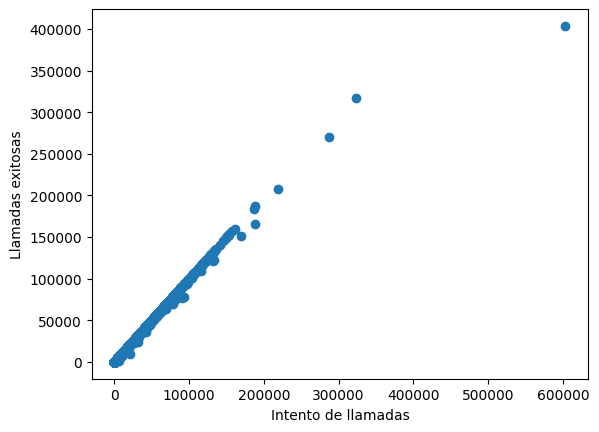

In [12]:
fig, axes =plt.subplots()

axes.scatter(df_red['INTENTOLLAMADA'],df_red['LLAMADASEXITO'])
plt.xlabel('Intento de llamadas')
plt.ylabel('Llamadas exitosas')
plt.show()

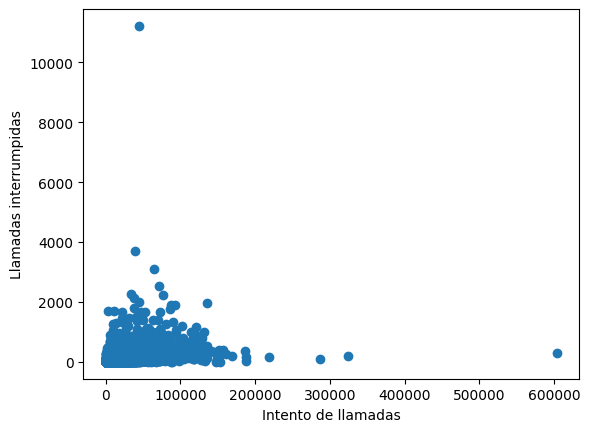

In [13]:
fig, axes =plt.subplots()

axes.scatter(df_red['INTENTOLLAMADA'],df_red['LLAMADAINTERRUP'])
plt.xlabel('Intento de llamadas')
plt.ylabel('Llamadas interrumpidas')
plt.show()

- Los intentos de llamadas  con relacion a las llamadas exitosas son proporcionales esto quiere decir los servicios de comunicaciones son buenos ya que el numero de llamadas casi siempre son exitosas
- Con relacion a las llamadas interrumpidas se puede apreciar que son en menor numero que las exitosas y que estan no aumentan en gran medida al crecer el numero de llamadas


In [37]:
def filtros(filtro):
    df_filtro=df_red.groupby([filtro]).agg(
    total_llamadas=("INTENTOLLAMADA", "sum"),
    llamadas_exito=("LLAMADASEXITO", "sum"),
    llamadas_interrup=("LLAMADAINTERRUP", "sum"),
    tiempo_interrup=("TIEMPOINTERRUP", "sum"),
    promedio_PEE=("PEE", "mean"),
    promedio_PFE=("PFE", "mean"))
    return df_filtro

In [39]:
prueba =filtros('REGION')
prueba

,total_llamadas,llamadas_exito,llamadas_interrup,tiempo_interrup,promedio_PEE,promedio_PFE
REGION,,,,,,
1,5265892,5246848,21990,557922,0.992753,0.982541
2,12044497,11996250,59256,767246,0.994600,0.980129
3,4648953,4636523,27047,684414,0.992732,0.981158
4,12607359,12576253,63224,1095002,0.994105,0.984678
5,33469890,33389423,147333,1313376,0.997736,0.990040
6,15792138,15724948,87320,800386,0.995473,0.989652
7,17248066,17159546,89068,705536,0.994633,0.988679
8,23077374,22995032,111427,6741884,0.994021,0.986666
9,13884063,13838746,90231,2001650,0.994990,0.985363


In [40]:
empresa_rendimiento_region = filtros('REGION')


empresa_rendimiento_region["tasa_exito"] = (
    empresa_rendimiento_region["llamadas_exito"] / empresa_rendimiento_region["total_llamadas"]
) * 100
empresa_rendimiento_region["tasa_interrup"] = (
    empresa_rendimiento_region["llamadas_interrup"] / empresa_rendimiento_region["total_llamadas"]
) * 100
empresa_rendimiento_region

,total_llamadas,llamadas_exito,llamadas_interrup,tiempo_interrup,promedio_PEE,promedio_PFE,tasa_exito,tasa_interrup
REGION,,,,,,,,
1,5265892,5246848,21990,557922,0.992753,0.982541,99.638352,0.417593
2,12044497,11996250,59256,767246,0.994600,0.980129,99.599427,0.491976
3,4648953,4636523,27047,684414,0.992732,0.981158,99.732628,0.581787
4,12607359,12576253,63224,1095002,0.994105,0.984678,99.753271,0.501485
5,33469890,33389423,147333,1313376,0.997736,0.990040,99.759584,0.440196
6,15792138,15724948,87320,800386,0.995473,0.989652,99.574535,0.552933
7,17248066,17159546,89068,705536,0.994633,0.988679,99.486783,0.516394
8,23077374,22995032,111427,6741884,0.994021,0.986666,99.643192,0.482841
9,13884063,13838746,90231,2001650,0.994990,0.985363,99.673604,0.649889


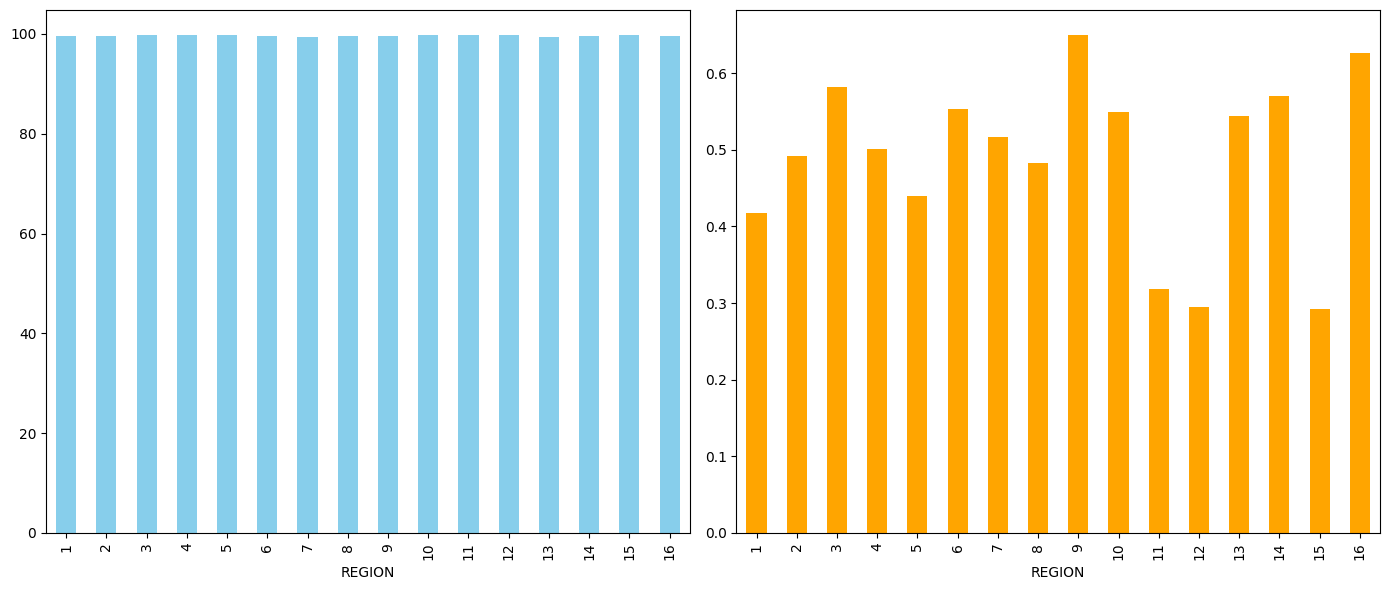

In [41]:
fig,axes=plt.subplots(1,2,figsize=(14, 6))


empresa_rendimiento_region['tasa_exito'].plot(kind='bar',ax=axes[0],color='skyblue')
empresa_rendimiento_region['tasa_interrup'].plot(kind='bar',ax=axes[1],color='orange')
plt.tight_layout()
plt.show()

- La tasa de llamadas exitosas por region es casi identicas con diferencias decimales, lo que indica que el servicio que provee a las diferentes es bastante similar 
- La tasa de llamadas interrumpidas cuenta con la 9 y 16 region con las tasas mas altas. puede deberse a la locacion de estas o a la cantidad de estaciones que se encuentran en la zona lo que no permita un buen servicio

In [19]:
# Agrupar los datos por estación (ID_ESTACION)
estaciones_rendimiento = df_red.groupby("ESTACIONBASE").agg(
    total_llamadas=("INTENTOLLAMADA", "sum"),
    llamadas_exito=("LLAMADASEXITO", "sum"),
    llamadas_interrup=("LLAMADAINTERRUP", "sum"),
    tiempo_interrup=("TIEMPOINTERRUP", "sum")
)

# Calcular tasa de interrupción y tiempo promedio de interrupción por estación
estaciones_rendimiento["tasa_interrup"] = (
    estaciones_rendimiento["llamadas_interrup"] / estaciones_rendimiento["total_llamadas"]
) * 100
estaciones_rendimiento["tiempo_promedio_interrup"] = (
    estaciones_rendimiento["tiempo_interrup"] / estaciones_rendimiento["llamadas_interrup"]
) 

# Filtrar estaciones con más problemas (alta tasa de interrupción o tiempo promedio elevado)
estaciones_problematicas = estaciones_rendimiento.sort_values(
    by=["tasa_interrup", "tiempo_promedio_interrup"], ascending=False
).head(5)

# Mostrar las estaciones problemáticas
estaciones_problematicas.reset_index()

,ESTACIONBASE,total_llamadas,llamadas_exito,llamadas_interrup,tiempo_interrup,tasa_interrup,tiempo_promedio_interrup
0,MIRA3U13,6,6,5,216,83.333333,43.200000
1,REVIZU13,37,36,29,360,78.378378,12.413793
2,LHTEMU04,383,383,266,468,69.451697,1.759398
3,SAEXFA,6,6,4,100800,66.666667,25200.000000
4,MIRA4U13,15,15,10,216,66.666667,21.600000


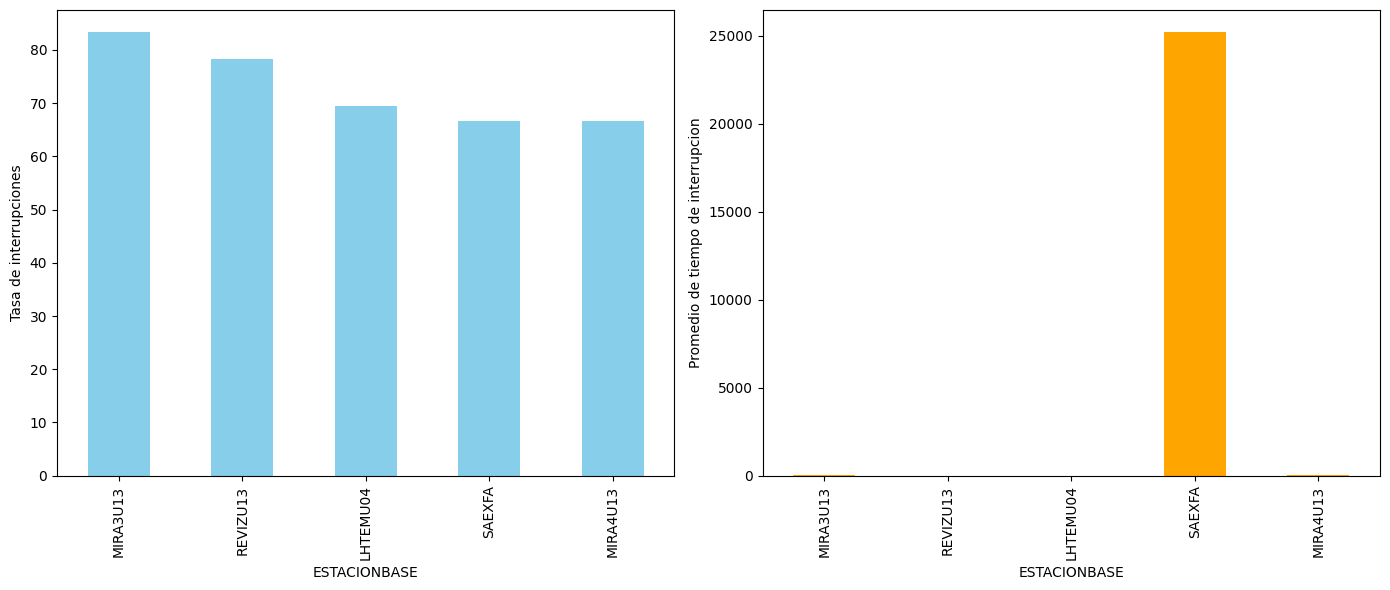

In [25]:
fig, axes=plt.subplots(1,2,figsize=(14, 6))

estaciones_problematicas['tasa_interrup'].plot(kind='bar',ax=axes[0], color="skyblue")
axes[0].set_ylabel('Tasa de interrupciones')
estaciones_problematicas['tiempo_promedio_interrup'].plot(kind='bar',ax=axes[1], color="orange")
axes[1].set_ylabel("Promedio de tiempo de interrupcion")
plt.tight_layout()
plt.show()

- La estacion que cuenta con la mayor tasa de interrupciones es la MRA3U13 lo cual es un 83.333333 %
- El tiempo de interrupcion por el otro lado la estacion SAEXFA cuenta con el el promedio mas alto con 25200 min 
- Con esto nos podemos dar cuenta que si bien el la tasa de interrupciones puede ser alta esto no indica que tiempo perdido por llamada sea alto

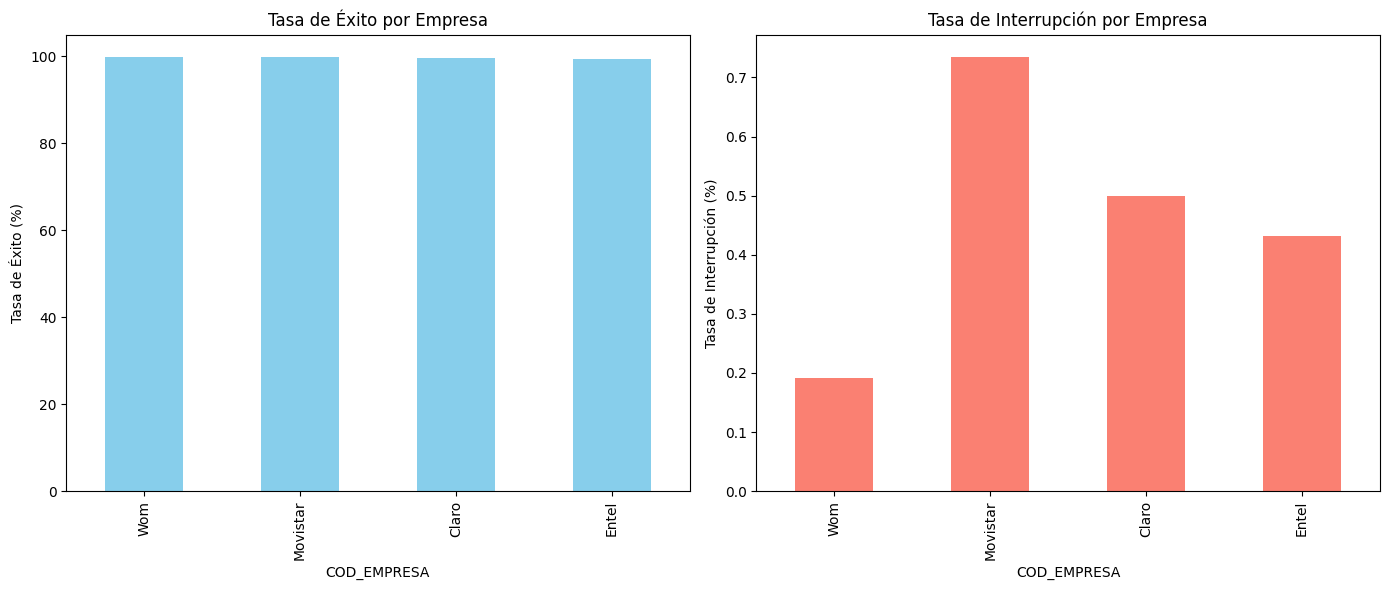

,COD_EMPRESA,total_llamadas,llamadas_exito,llamadas_interrup,tiempo_interrup,promedio_PEE,promedio_PFE,tasa_exito,tasa_interrup
0,Wom,27711517,27689125,52990,367698,0.999040,0.997292,99.919196,0.191220
1,Movistar,92369418,92104569,679287,23732621,0.997679,0.981420,99.713272,0.735402
2,Claro,74946490,74645281,374497,9834907,0.991484,0.989792,99.598101,0.499686
3,Entel,100167259,99537152,433003,1031908,0.997133,0.988975,99.370945,0.432280


In [42]:
empresa_rendimiento = filtros('COD_EMPRESA')


# Calcular tasas
empresa_rendimiento["tasa_exito"] = (
    empresa_rendimiento["llamadas_exito"] / empresa_rendimiento["total_llamadas"]
) * 100
empresa_rendimiento["tasa_interrup"] = (
    empresa_rendimiento["llamadas_interrup"] / empresa_rendimiento["total_llamadas"]
) * 100

# Ordenar por tasa de éxito
empresa_rendimiento = empresa_rendimiento.sort_values(by="tasa_exito", ascending=False)

# Visualización: Comparar tasas de éxito y tasas de interrupción por empresa
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Tasa de éxito
empresa_rendimiento["tasa_exito"].plot(
    kind="bar", ax=axes[0], color="skyblue", title="Tasa de Éxito por Empresa"
)
axes[0].set_ylabel("Tasa de Éxito (%)")

# Tasa de interrupción
empresa_rendimiento["tasa_interrup"].plot(
    kind="bar", ax=axes[1], color="salmon", title="Tasa de Interrupción por Empresa"
)
axes[1].set_ylabel("Tasa de Interrupción (%)")

plt.tight_layout()
plt.show()

# Mostrar los datos calculados
empresa_rendimiento.reset_index()

- La tasa de llamadas exitosas por empresa es casi igual teniendo diferencias decimales
- Por otro lado la tasa de interrupciones la empresa que cuenta con mas es la de movistar

# Hipotesis

- h0 = La proporcion de llamadas establecidas con exito (PEE) es igual en zonas Urbanas y rurales
- h1 = La proporcion de llamadas establecidas con exito (PEE) es diferente en zonas Urbanas y rurales

In [45]:
zonas_r = df_red[df_red['TIPOEMPLAZAMIENTO']=='R']['PEE']
zonas_U = df_red[df_red['TIPOEMPLAZAMIENTO']=='U']['PEE']

alpha = 0.05
result = st.ttest_ind(zonas_r,zonas_U,equal_var=True)
print('valor p:',result.pvalue)
if result.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis nula')


valor p: 1.6089923522029626e-46
Rechazamos la hipotesis nula


- Se rechazo la hipotesis nula, lo que quiere decir que el PEE difiere de las zonas urbanas y rurales, puede ser debido a la cantidad de estaciones o al tipo de configuracion de estas lo que proboca que las llamadas exitosas no sean iguales.

In [53]:
def com(telefonia):
    filtro = df_red[df_red['COD_EMPRESA']==telefonia]['PEE']
    return filtro
filtro_movistar=com('Movistar')
filtro_entel=com('Entel')
filtro_claro=com('Claro')
filtro_wom=com('Wom')

f_stat, p = st.f_oneway(filtro_movistar,filtro_entel,filtro_claro,filtro_wom)
print("Estadístico F:", f_stat)
print("p-valor:", p)

if p < 0.05:
    print("Existen diferencias significativas en las tasas de éxito entre las compañías.")
else:
    print("No se encontraron diferencias significativas en las tasas de éxito.")


Estadístico F: 118.07456020616263
p-valor: 8.506641292451711e-76
Existen diferencias significativas en las tasas de éxito entre las compañías.


- La hipotesis nula se rechazo esto quiere decir que a pesar de verse relativamente iguales en cuanto la proporcion de exito de llamadas no es igual para las compañias, por lo verificar la mas eficas o la que posee menos tiempo de interrupcion seria el factor para elegir alguna.

# Conclusiones

- Con la informacion diponible podemos apreciar que la tasa de llamadas de exitosa es casi identica en todas la compañias lo cual tambien se puede evidenciar en las diferentes regiones.
- El PEE Y PFE que corresponde a la proporcion de llamadas establecidas con exito y la porporcion de llamadas finalizadas con exito respectivamente es en promedio sobre el 97% lo que quiere decir que las compañias estan cumpliendo con el estadar el cual es porcetaje mencionado anteriormente 
- La region de La Araucania y la de Arica y Parinacota son las que presentan mas llamadas con interrupciones, lo que puede deberse al cantidad de estaciones que puedan tener
- La estacion que cuenta con la mayor tasa de interrupciones es la MRA3U13 lo cual es un 83.333333 %, lo cual puede deberse a una sobre saturacion o problemas en como esta intalada
- En cuanto al tiempo promedio de interrupcion es menor en general menos para la estacion SAEXFA lo que puede indicar algun probla tecnico que aumente el tiempo de interrupcion
- Las hipotesis probadas mostraron que las compañias y las zonas al verse similares en cuanto al PEE no se puede considarar iguales por lo que un factor para decidir puede ser la compañia mas eficas con respecto al PEE o la que tiene menor interrupciones 